In [43]:
import numpy as np
import tensorflow as tf

from tensorflow import keras
from keras import Sequential
from keras.datasets import mnist
from keras.layers import Dense, Flatten
from keras.optimizers import Adam
from keras.utils import to_categorical
from matplotlib import pyplot as plt

NUM_OF_CLASSES = 10

In [34]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

y_train = to_categorical(y_train, NUM_OF_CLASSES)
y_test = to_categorical(y_test, NUM_OF_CLASSES)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(60000, 28, 28)
(60000, 10)
(10000, 28, 28)
(10000, 10)


In [35]:
model = Sequential([
    Dense(200, activation='relu', input_shape=(28, 28)),
    Flatten(),
    Dense(150, activation='relu'),
    Dense(10, activation='softmax'),
])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 28, 200)           5800      
_________________________________________________________________
flatten_4 (Flatten)          (None, 5600)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 150)               840150    
_________________________________________________________________
dense_15 (Dense)             (None, 10)                1510      
Total params: 847,460
Trainable params: 847,460
Non-trainable params: 0
_________________________________________________________________


In [36]:
opt = Adam(lr=0.005) 

model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [37]:
history = model.fit(x_train, y_train, batch_size=28, epochs=10)

Epoch 1/10
2143/2143 [==============================] - 15s 7ms/step - loss: 0.1770 - accuracy: 0.9443
Epoch 2/10
2143/2143 [==============================] - 17s 8ms/step - loss: 0.0970 - accuracy: 0.9709
Epoch 3/10
2143/2143 [==============================] - 20s 9ms/step - loss: 0.0736 - accuracy: 0.9777
Epoch 4/10
2143/2143 [==============================] - 17s 8ms/step - loss: 0.0593 - accuracy: 0.9822
Epoch 5/10
2143/2143 [==============================] - 16s 8ms/step - loss: 0.0529 - accuracy: 0.9848
Epoch 6/10
2143/2143 [==============================] - 14s 7ms/step - loss: 0.0509 - accuracy: 0.9857
Epoch 7/10
2143/2143 [==============================] - 15s 7ms/step - loss: 0.0407 - accuracy: 0.9891
Epoch 8/10
2143/2143 [==============================] - 13s 6ms/step - loss: 0.0377 - accuracy: 0.9904
Epoch 9/10
2143/2143 [==============================] - 12s 6ms/step - loss: 0.0417 - accuracy: 0.9903
Epoch 10/10
2143/2143 [==============================] - 14s 6ms/step - l

In [38]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3204 - accuracy: 0.9648


[0.32035163044929504, 0.9648000001907349]

In [46]:
CLASSES = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

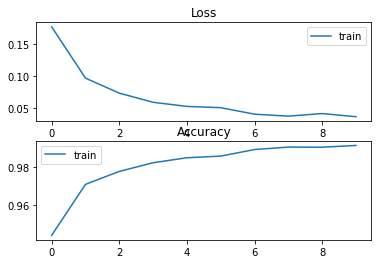

In [47]:
# plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.legend()

# plot mse during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.legend()
plt.show()

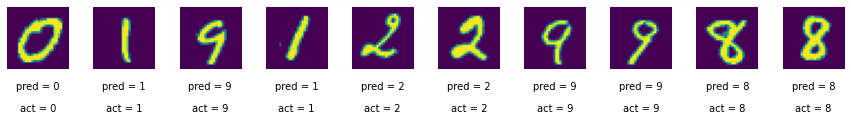

In [48]:
n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes) 
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)